# Proyecto 13. Pronósticos y predicciones

# Índice
1. [Introducción](#Introducción)
2. [Análisis exploratorio de datos (EDA)](#Análisis-exploratorio-de-datos-(EDA))
3. [Valores nulos y duplicados](#Valores-nulos-y-duplicados)
4. [Valores medios](#Valores-medios)
5. [Matriz de correlación](#Matriz-de-correlación)
6. [Modelo para predecir la cancelación de usuarios](#Modelo-para-predecir-la-cancelación-de-usuarios)
7. [Regresión Logística](#Regresión-Logística)
8. [Bosque Aleatorio](#Bosque-Aleatorio)
9. [Métricas de clasificación](#Métricas-de-clasificación)
10. [Creación de clústeres de usuarios](#Creación-de-clústeres-de-usuarios)
11. [Valores medios por clúster](#Valores-medios-por-clúster)
12. [Tasa de cancelación](#Tasa-de-cancelación)
13. [Conclusión](#Conclusión)

# Introducción
Model Fitness, una cadena de gimnasios en expansión, está desarrollando una estrategia centrada en la interacción con sus clientes mediante el uso de análisis de datos. Uno de los retos más comunes que enfrentan tanto los gimnasios como otros servicios es la pérdida de clientes, un fenómeno que puede ser difícil de detectar. Si bien la forma más directa de medir la pérdida es a través de la cancelación de cuentas o la falta de renovación de contratos, a menudo los clientes se van de forma menos obvia, sin dejar señales claras de su abandono.

Un cliente que no asiste a sus entrenamientos durante un mes es una señal clara de que podría haber abandonado el servicio, aunque las razones pueden variar, como vacaciones o una baja temporal. Sin embargo, en la mayoría de los casos, la ausencia prolongada de un cliente en un gimnasio puede indicar que no regresará.

Con el objetivo de abordar este problema, Model Fitness ha digitalizado los perfiles de sus clientes, lo que permite un análisis detallado de sus comportamientos. El análisis de estos datos tiene como objetivo predecir la probabilidad de pérdida de cada cliente, identificar patrones de cancelación, y elaborar estrategias que ayuden a mejorar la retención. Además, se busca desarrollar perfiles detallados de los clientes más frecuentes y leales, y así proponer medidas para reducir la tasa de rotación.

En este informe, se analizarán los factores más influyentes en la pérdida de clientes, se identificarán los grupos con mayores tasas de cancelación y se propondrán recomendaciones clave para mejorar la atención y fidelización de los usuarios de Model Fitness.

# Análisis exploratorio de datos (EDA)

Se importan las librerías necesarias para este proyecto

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Creación del data frame para este proyecto

In [4]:
df=pd.read_csv(r"gym_churn_us.csv")

Información general para el data frame

In [5]:
#Primeras 5 filas del data frame
print(df.head())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [6]:
#Usando .info() en el data frame
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
#Usando el .describe en el data frame
print(df.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

# Valores nulos y duplicados

Valores nulos

In [8]:
print("Valores nulos en el data frame df")
print(df.isnull().sum())

Valores nulos en el data frame df
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


No se encontraron valores nulos en ninguna columna

Valores duplicados

In [9]:
print("Valores dulicados del data frame Eventos")
print(df.duplicated().sum())

Valores dulicados del data frame Eventos
0


No se encontraron valores duplicados

# Valores medios

Observaremos los valores medios de las características en dos grupos para las personas que se fueron (cancelación) 0 y para las  que se quedaron 1. 

In [10]:
df_1=df.groupby("Churn").mean().reset_index()
cancelan=df_1.query('Churn == 1')
quedan=df_1.query('Churn == 0')

print("Valores medios de características de las personas que se quedan")
print(cancelan)
print("\n")

print("Valores medios de características de las personas que cancelan")
print(quedan)

Valores medios de características de las personas que se quedan
   Churn    gender  Near_Location   Partner  Promo_friends     Phone  \
1      1  0.510839       0.768143  0.355325       0.183789  0.902922   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
1         1.728558      0.268615  26.989632                    115.082899   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
1               1.662582  0.990575                   1.474995   

   Avg_class_frequency_current_month  
1                           1.044546  


Valores medios de características de las personas que cancelan
   Churn    gender  Near_Location   Partner  Promo_friends     Phone  \
0      0  0.510037       0.873086  0.534195       0.353522  0.903709   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         5.747193      0.464103  29.976523                    158.445715   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total 

Podemos observar que los usuarios que se quedan tienden a tener contratos más cortos y menos visitas grupales, lo que podría indicar que prefieren la flexibilidad y la opción de renovar a corto plazo. Por otro lado, los usuarios que cancelan tienen contratos más largos y, en promedio, un mayor tiempo de membresía. Esto sugiere que los usuarios con más tiempo en el gimnasio podrían sentirse menos comprometidos o insatisfechos con el servicio, especialmente si no están percibiendo un valor continuo en su experiencia.

Aunque los usuarios que cancelan tienen una mayor frecuencia de visitas en general, su asistencia no ha sido suficiente para evitar la cancelación. Además, este grupo tiende a gastar más en servicios adicionales, lo que podría ser un indicador de que la oferta del gimnasio no está satisfaciendo completamente sus expectativas, llevando a la cancelación a pesar del gasto extra.

# Histogramas de barras y distribuciones de características 

Creando gráficos de histogramas para todas las características 

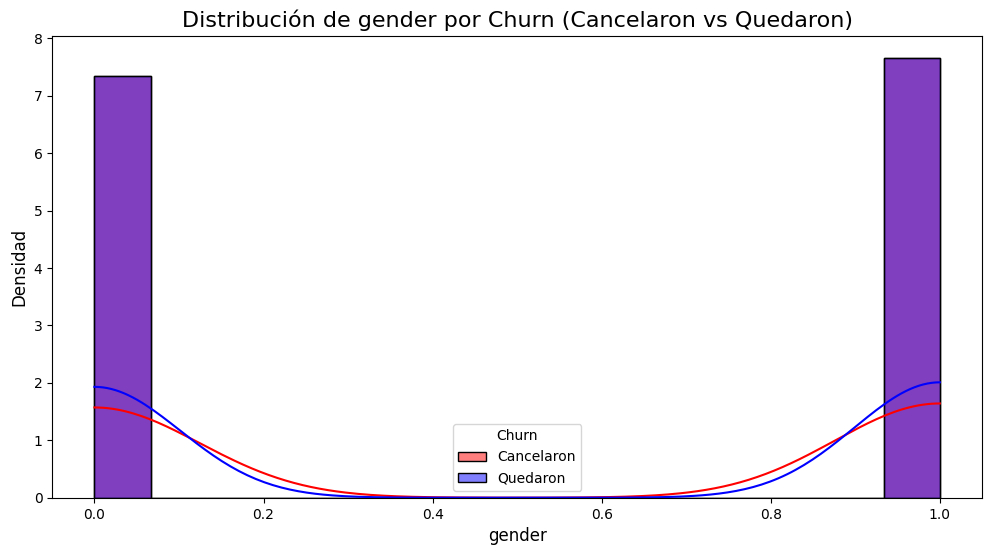

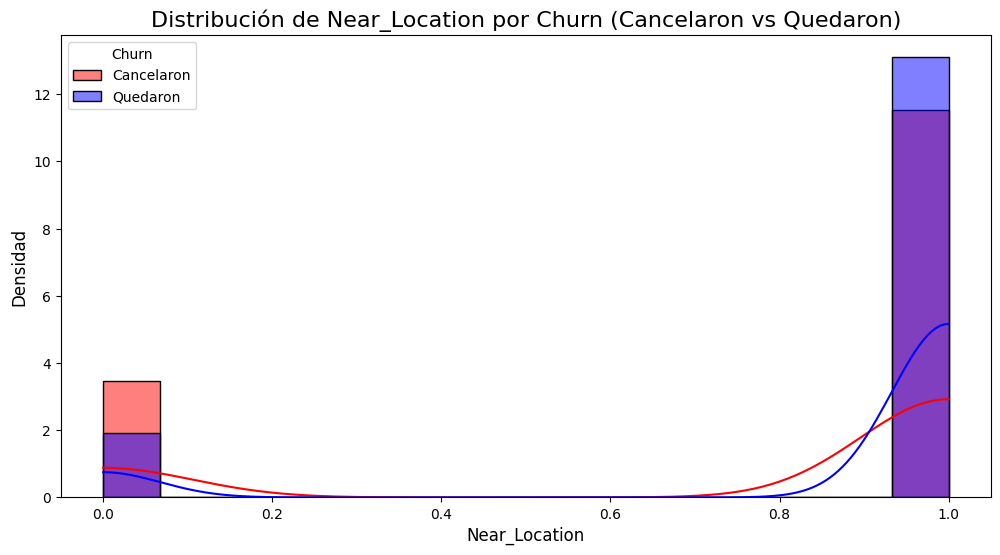

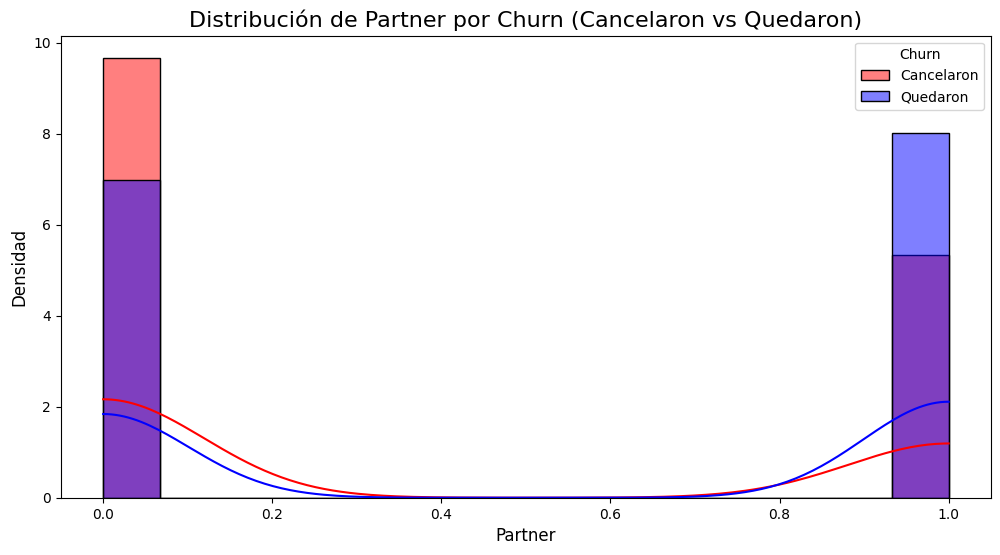

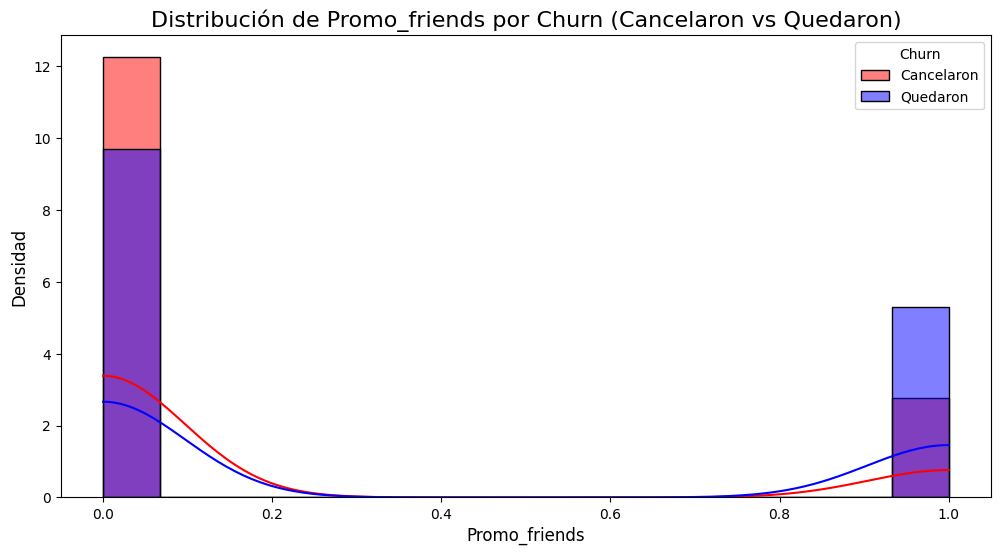

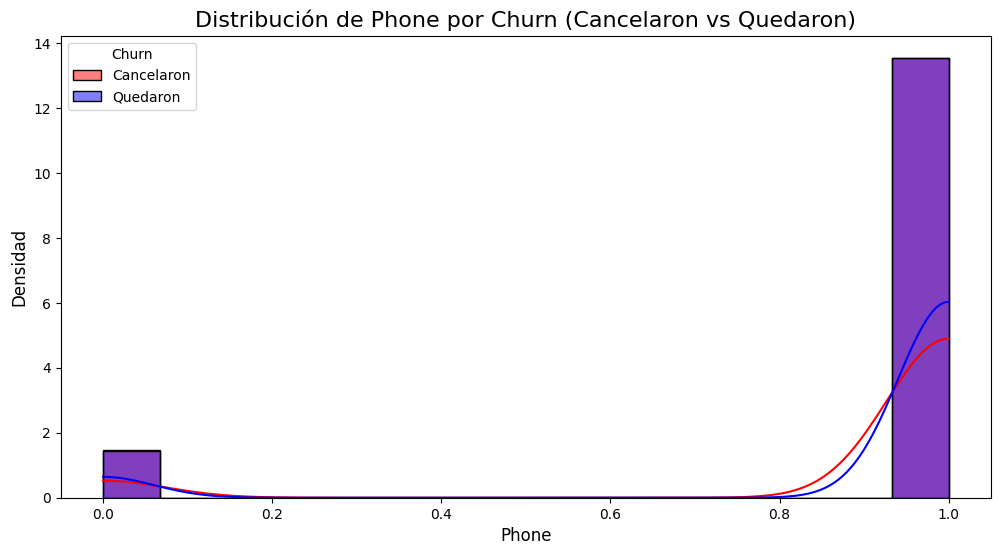

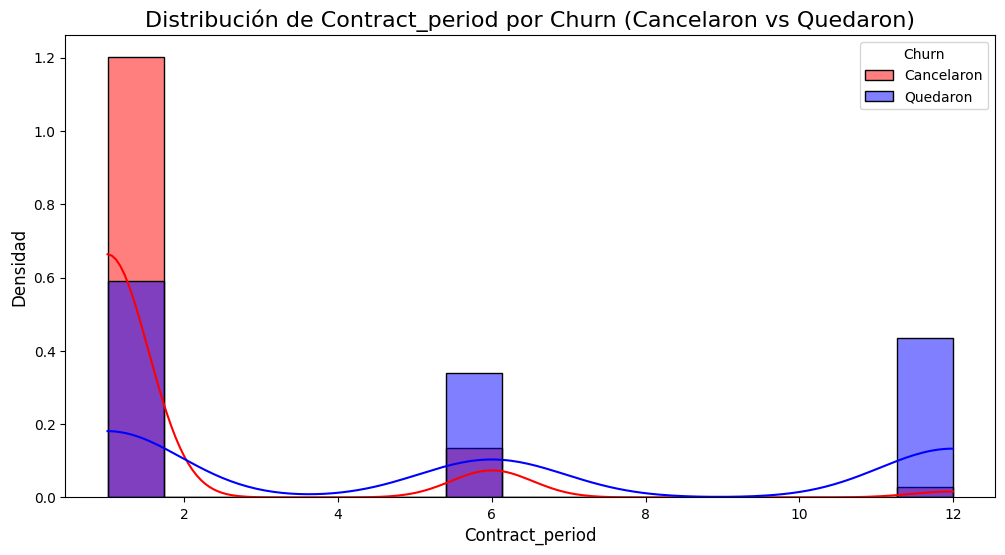

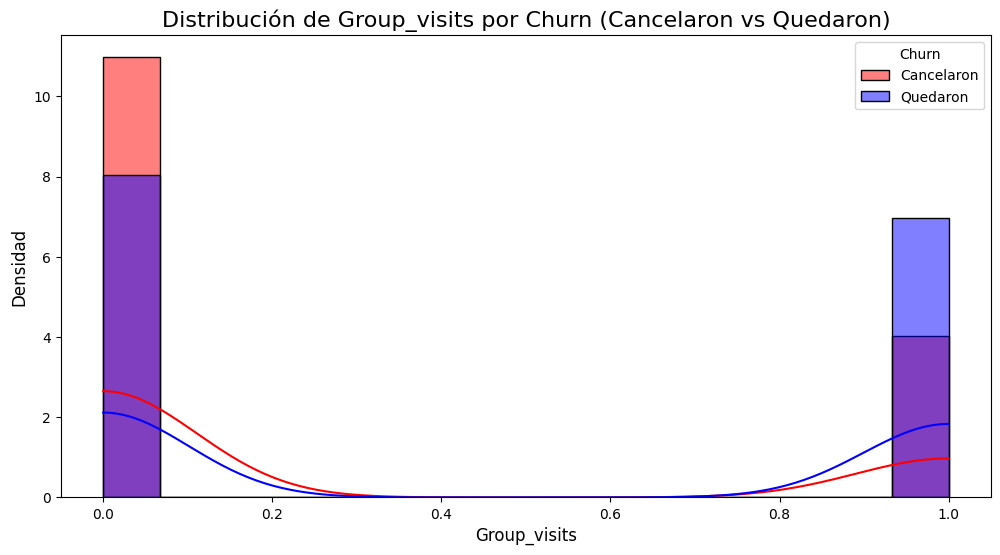

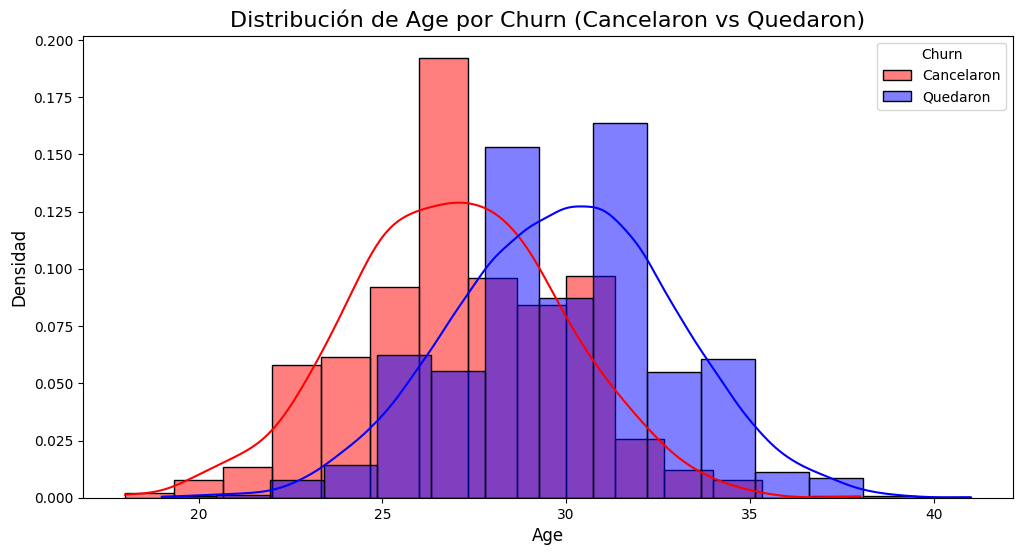

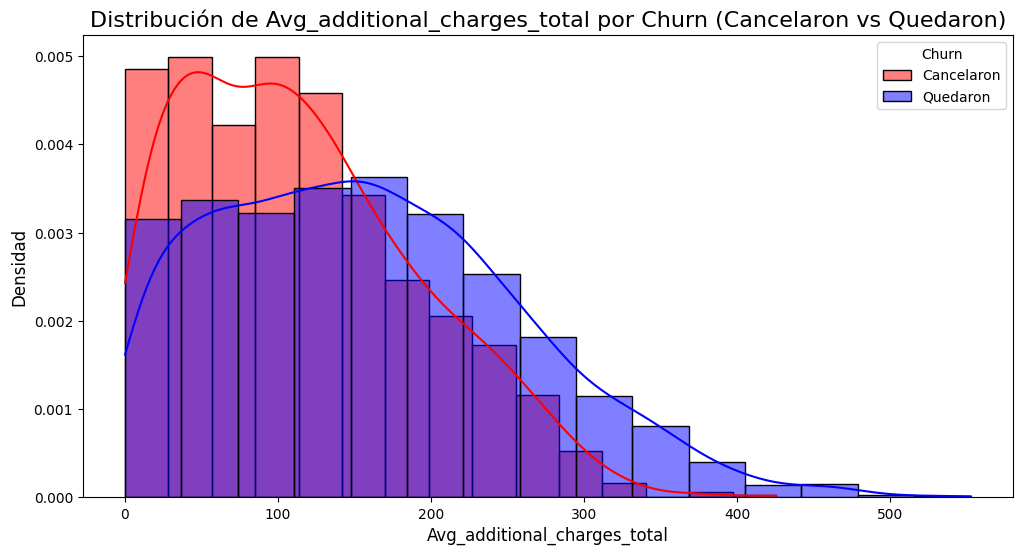

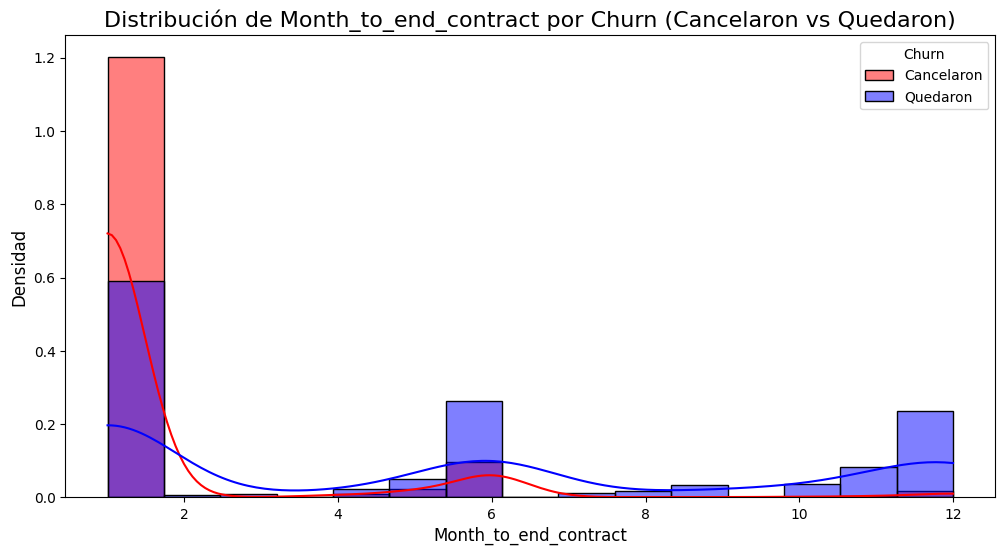

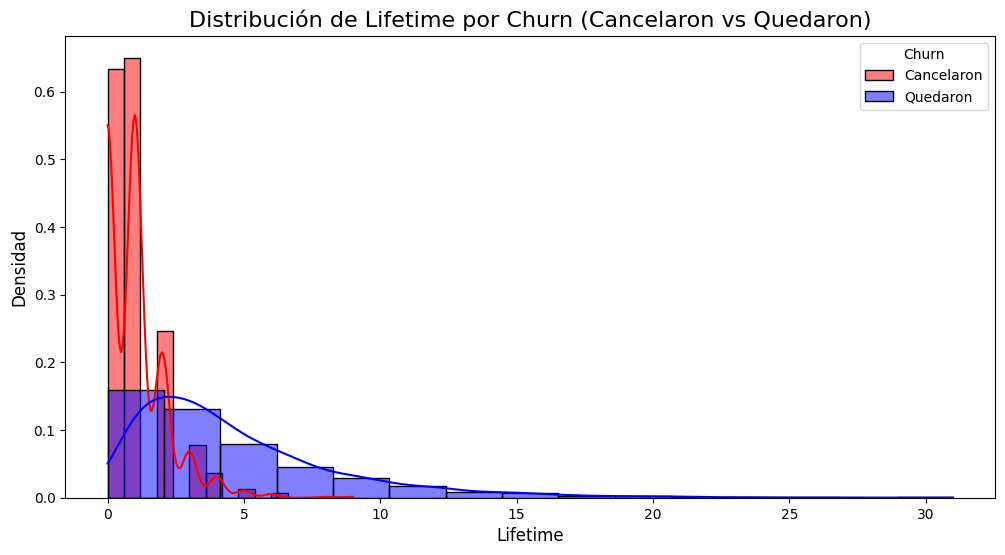

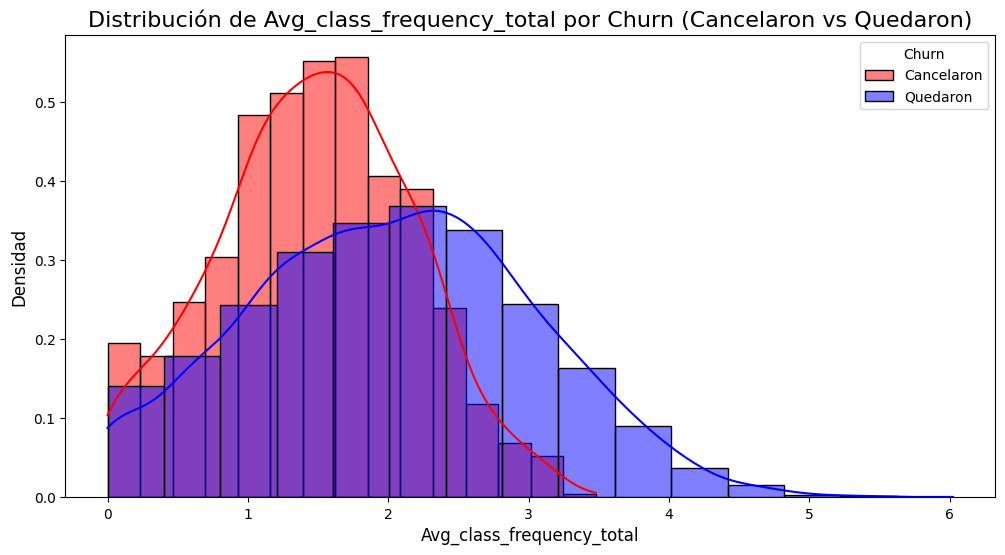

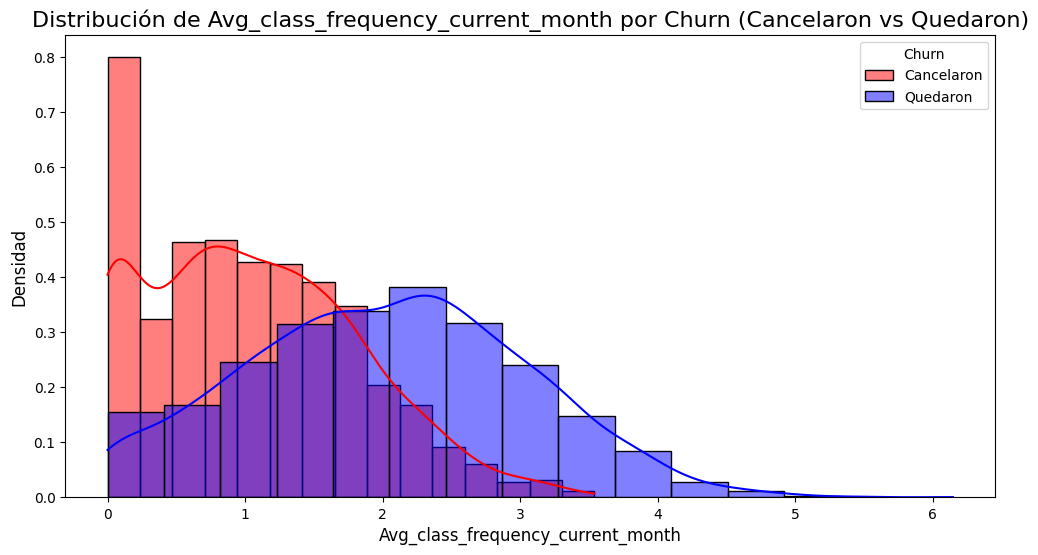

In [11]:
for feature in df.drop('Churn', axis=1).columns:  
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['Churn'] == 1][feature], bins=15, kde=True, color='red', label='Cancelaron', stat="density")
    sns.histplot(df[df['Churn'] == 0][feature], bins=15, kde=True, color='blue', label='Quedaron', stat="density")
    plt.legend(title='Churn')
    plt.title(f'Distribución de {feature} por Churn (Cancelaron vs Quedaron)', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.show()


Podemos notar que en este caso que Los histogramas muestran diferencias significativas en la distribución de ciertas características entre los usuarios que cancelan y los que se quedan, lo que resalta las variaciones clave que podrían influir en la decisión de cancelar o permanecer con la membresía que se tomaron en el punto anterior. En cada gráficael comportamiento de los usuarios dominan dependiendo de las características que se visualiza. 

# Matriz de correlación

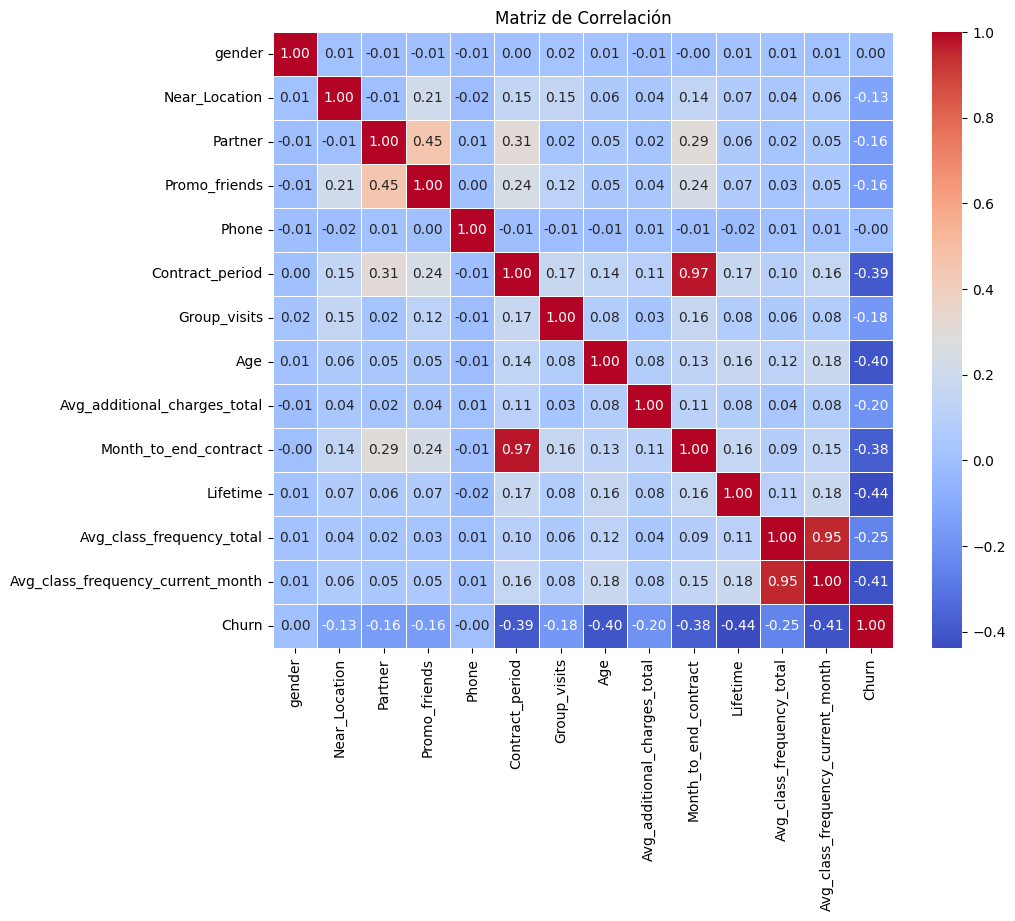

In [12]:
plt.figure(figsize=(10, 8))
cm = df.corr()  # Obtienes la matriz de correlación
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Los factores más influyentes parecen ser el tiempo de contrato, la frecuencia de visitas y la duración de la membresía, una mayor retención podría lograrse mediante ajustes en los contratos, en base a la satisfacción de los usuarios de largo plazo o incentivando la frecuencia de asistencia de manera más personalizada.

Algunos de los datos que obtenemos del mapa de calor son:

Churn y Contract_period: Existe una fuerte correlación negativa (-0.39) entre el tiempo del contrato y la cancelación. Esto sugiere que los usuarios con contratos más largos tienen una mayor probabilidad de cancelar.

Churn y Lifetime: La correlación negativa (-0.44) entre la duración de la membresía  y la cancelación sugiere que los usuarios que han estado más tiempo en el gimnasio tienen más probabilidades de cancelar.

Churn y Avg_class_frequency_current_month: La correlación negativa de -0.41 entre la frecuencia de visitas del mes actual y la cancelación también es destacable, esta sugiere que los usuarios que más asisten en el mes tienden a cancelar más a pesar de tener una mayor asistencia.

Avg_class_frequency_total y Avg_class_frequency_current_month: La fuerte correlación positiva de 0.95 entre la frecuencia total de clases y la frecuencia actual de clases es esperada, ya que los usuarios que han sido frecuentes en el pasado tienden a seguir siéndolo en el presente.

# Modelo para predecir la cancelación de usuarios

Se toma como variable objetivo los datos de la columna Churn, la cual nos dice que si un usuario permanece en el gimnasio o si ya cancelo.

Se divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [13]:
#Se elimina la columna con la variable objetivo
X = df.drop('Churn', axis = 1)
#Se guarda la variable objetivo en una variable diferente
y = df['Churn']

#Usando la función train_test_split()
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

#Se estandarixan datos, se crea objeto StandardScaler y se aplica al conjunto de entrenamiento
scaler = StandardScaler()

#Se entrena el scaler y transforma la matriz para el conjunto de entrenamiento estandarizados
X_train_st = scaler.fit_transform(X_train)

#Se aplica la estandarización a la matriz de característica para el test de prueba estandarizado
X_test_st = scaler.transform(X_test) 

Entrenando el modelo en el set de entrenamiento con los métodos regresión logística y bosque aleatorio.

# Regresión Logística

In [14]:
reg_log = LogisticRegression(max_iter=700)
reg_log.fit(X_train_st, y_train)
r_pred=reg_log.predict(X_test_st)

# Bosque Aleatorio

In [15]:
bosque = RandomForestClassifier()
bosque.fit(X_train_st, y_train)
bosque_pred=bosque.predict(X_test_st)

# Métricas de clasificación 

Se evaluará la exactitud, precisión y recall para ambos modelos utilizando los datos de validación con el fin de comparar los modelos y determinar cual es el mejor de ellos en este caso.

In [16]:
def c_metrics(y_true, y_pred, title = '{modelo}'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
c_metrics(y_test,r_pred,"LogisticRegression")
print("\n")

c_metrics(y_test,bosque_pred,"RandomForestClassifier")

LogisticRegression
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


RandomForestClassifier
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.81


Ambos modelos tienen una exactitud del 92%, pero la diferencia radica en las métricas de precisión y recall. La regresión logística tiene una ligera ventaja en ambas métricas, lo que sugiere que este modelo está haciendo un poco mejor trabajo al identificar correctamente tanto los casos positivos (clientes que cancelan) como los negativos (clientes que no cancelan).

# Creación de clústeres de usuarios

Se estandarizan los datos

In [17]:
#Se toma este data frame ya que el mismo excluye la variable objetivo
dfs=scaler.fit_transform(X)

Se utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada 

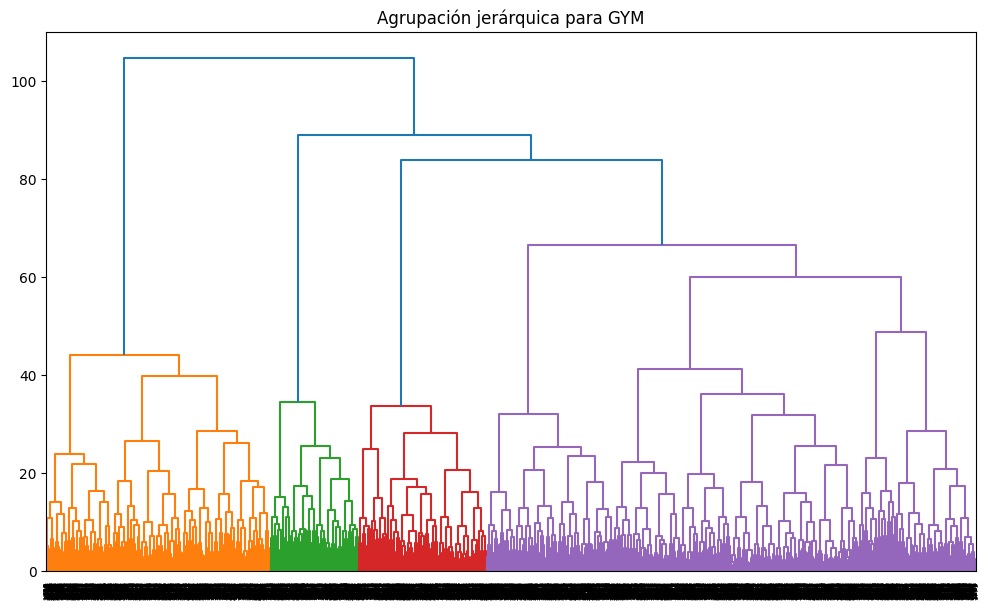

In [18]:
linked = linkage(dfs, method = 'ward')
plt.figure(figsize=(12, 7))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

Se entrena el modelo de clustering con el algortimo K-means para predir los clústeres de clientes, el número de clústeres a considerar con n=5 dado el gráfico de la matriz de distancia anterior.

In [19]:
km = KMeans(n_clusters = 5) # establecer el número de clústeres en 5
labels = km.fit_predict(dfs) # Predice los clústeres para los datos estandarizados
df['Cluster'] = labels # Añadir la columna de los clústeres al DataFrame original
print(df.head())  # Muestra las primeras filas del DataFrame con la asignación de clúster
#print(df['Cluster'].unique())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

# Valores medios por clúster

Obtención de valores medios de característica para los clústeres.

In [20]:
dfa=df.groupby(['Cluster']).mean()
print(dfa)

           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.000000       1.000000  0.368978       0.256169  0.898942   
1        0.583226       0.972903  0.380645       0.268387  0.904516   
2        0.494505       0.000000  0.465201       0.076923  0.915751   
3        0.508213       0.949758  0.766184       0.551691  0.902415   
4        1.000000       1.000000  0.366961       0.245902  0.900378   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               2.122209      0.341951  28.439483   
1               2.912258      0.476129  30.436129   
2               2.225275      0.214286  28.478022   
3              11.292754      0.561353  29.973913   
4               2.218159      0.366961  28.215637   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                 

Trazando distribuciones de características para los clústeres.

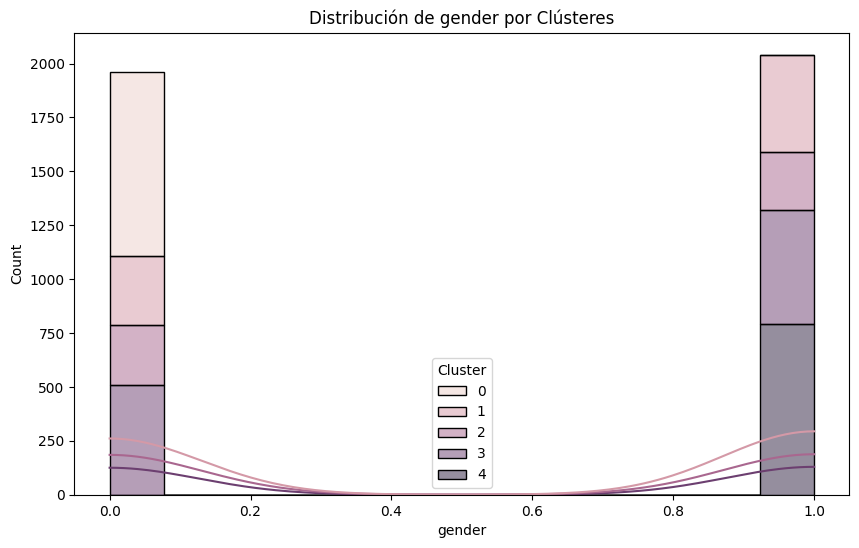

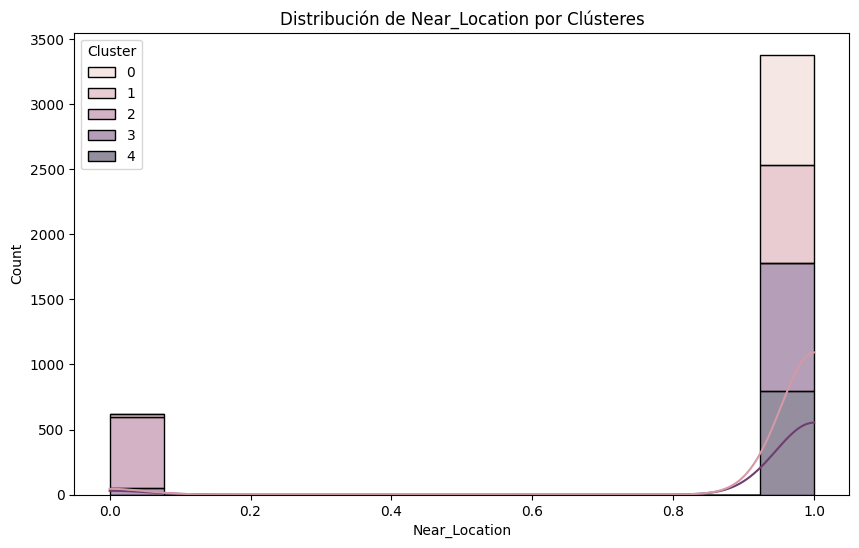

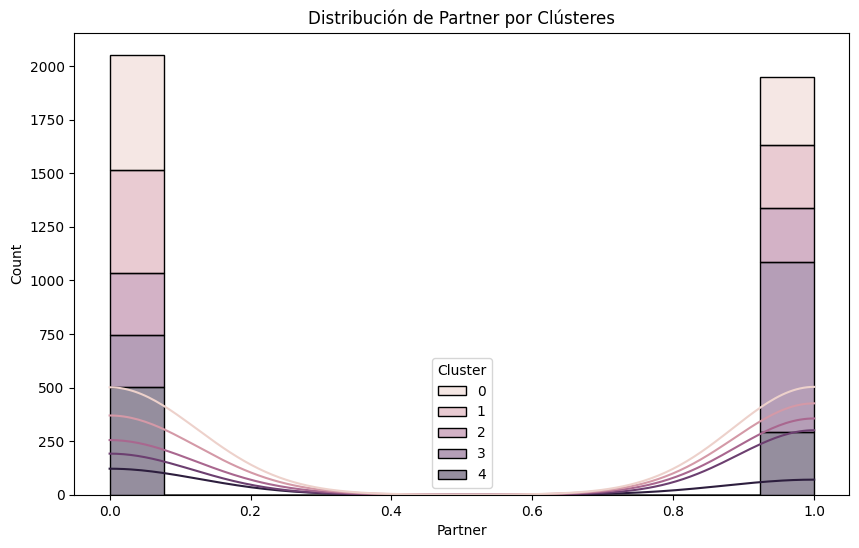

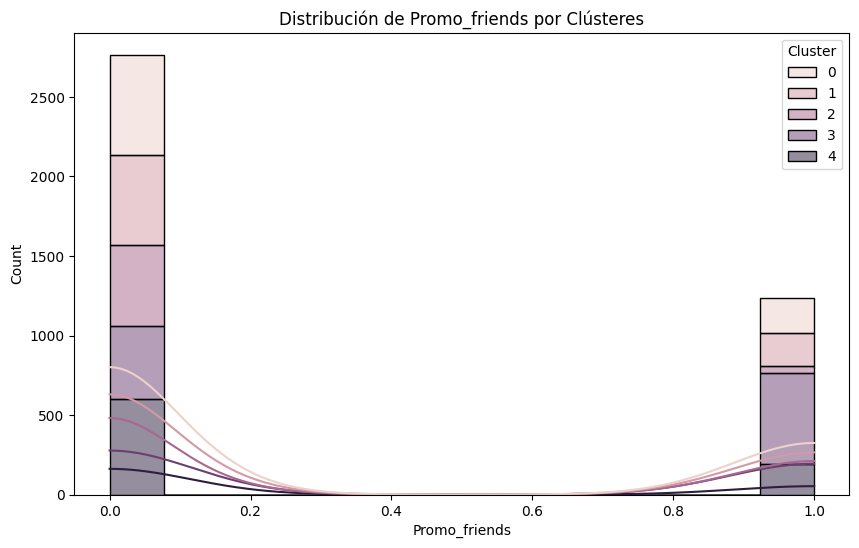

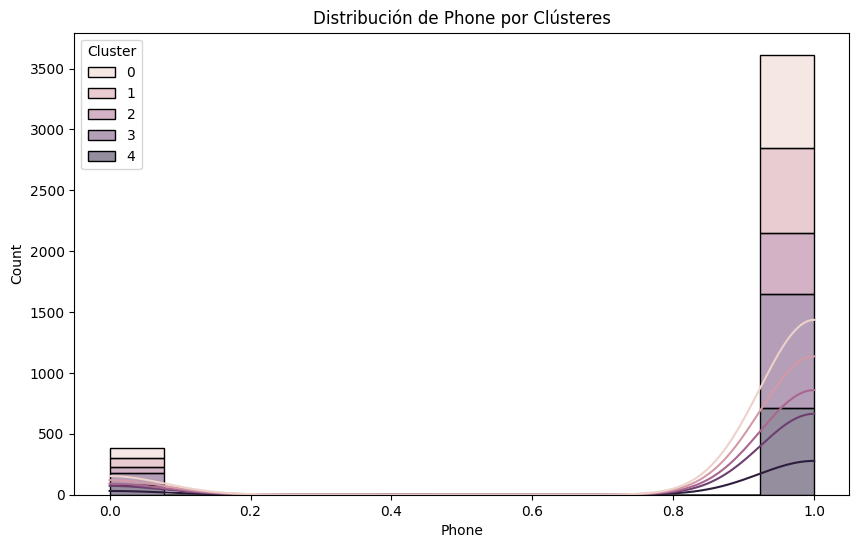

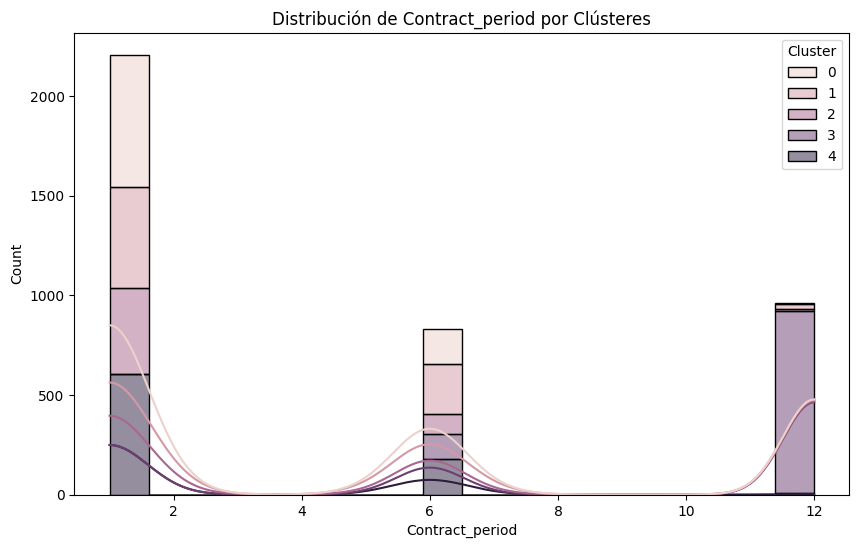

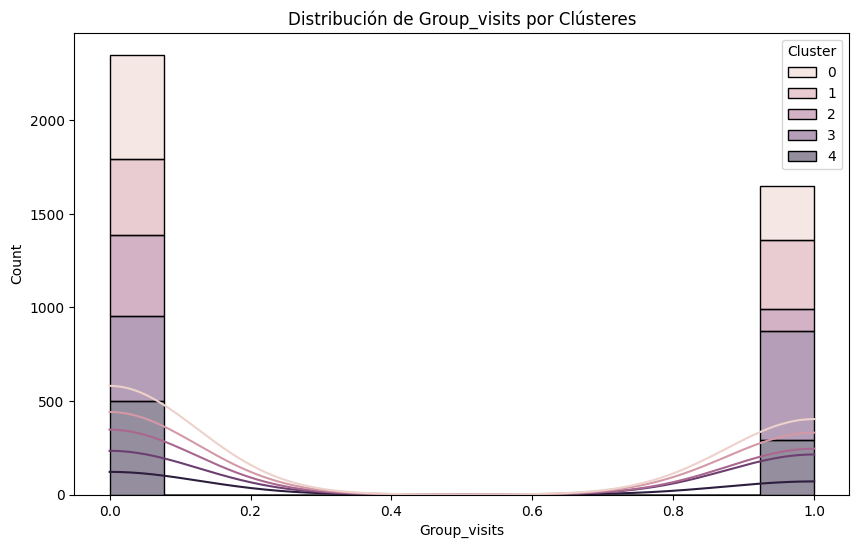

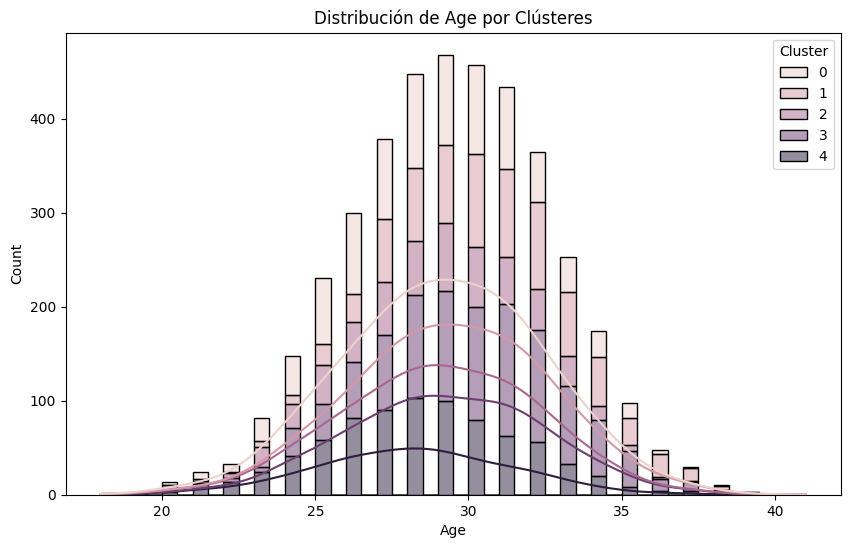

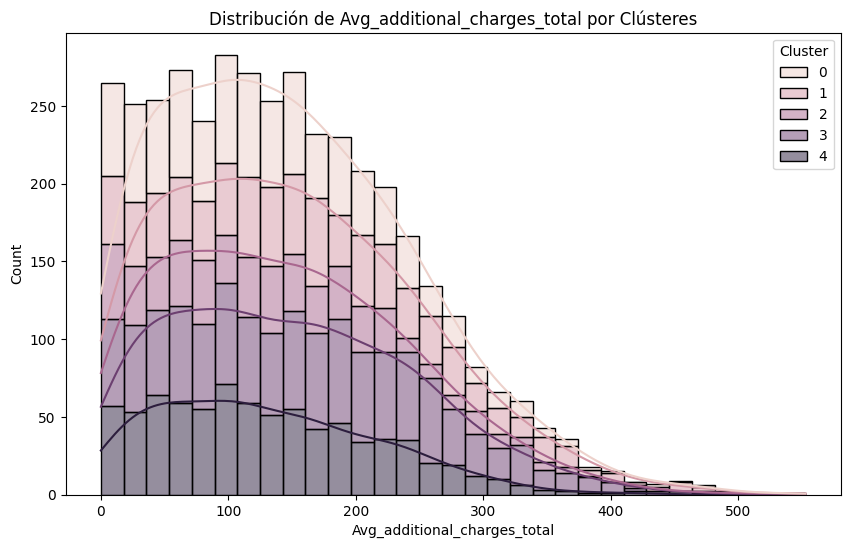

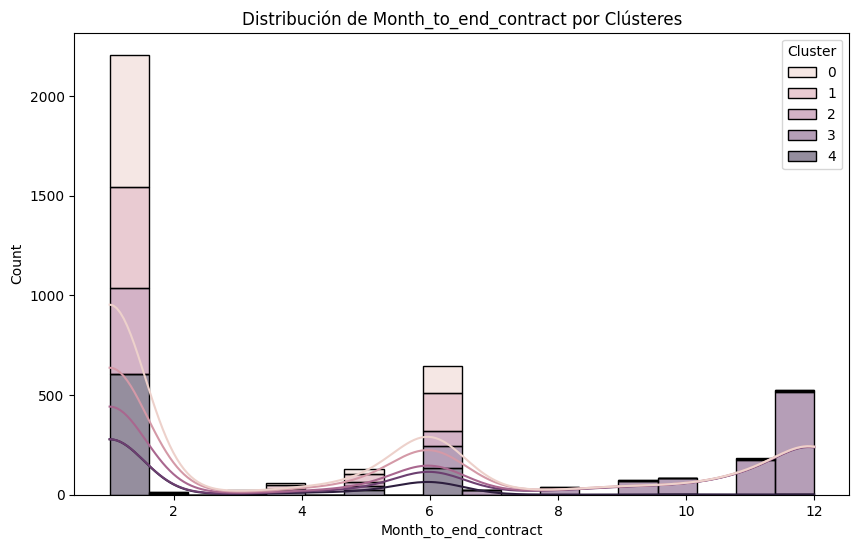

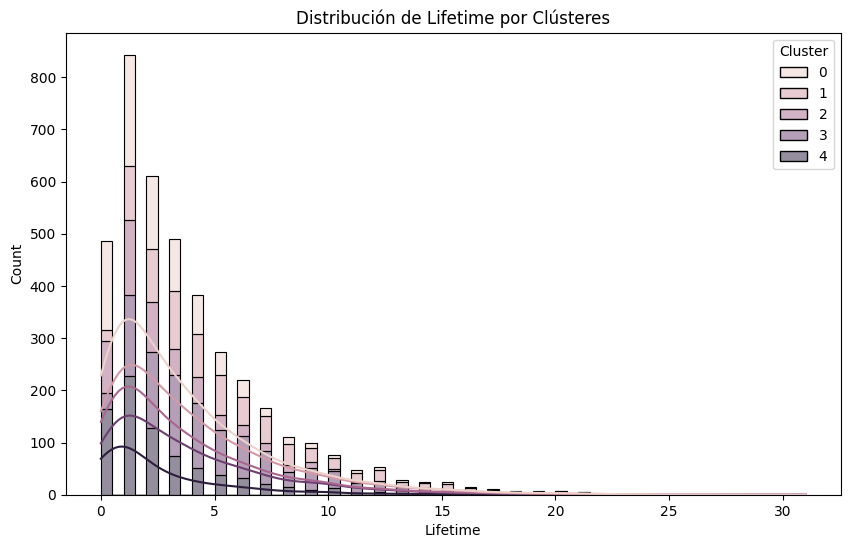

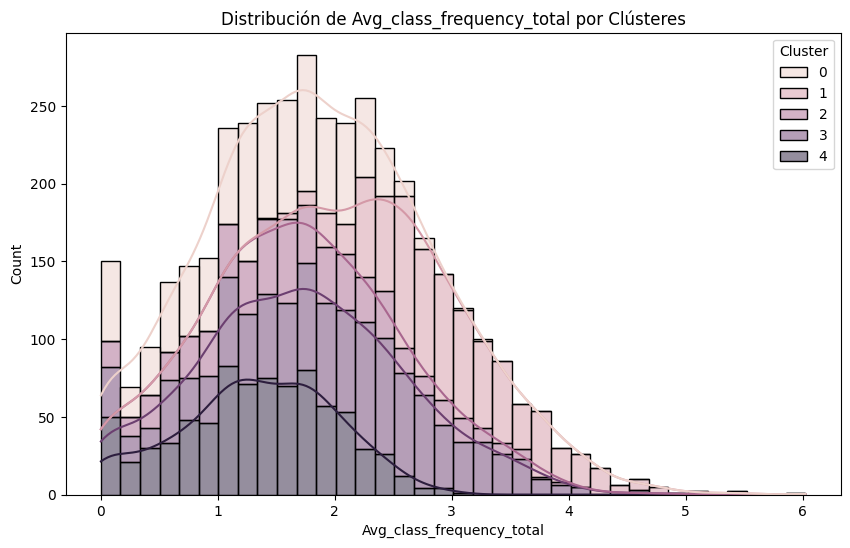

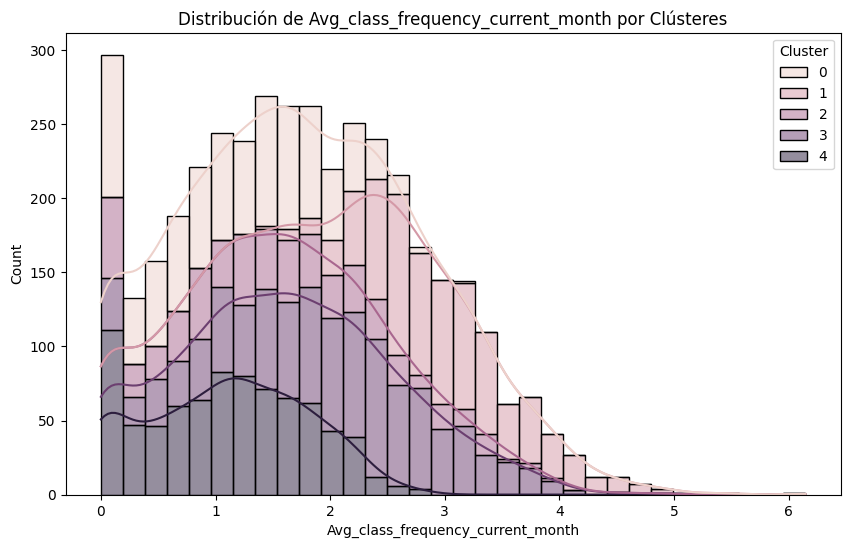

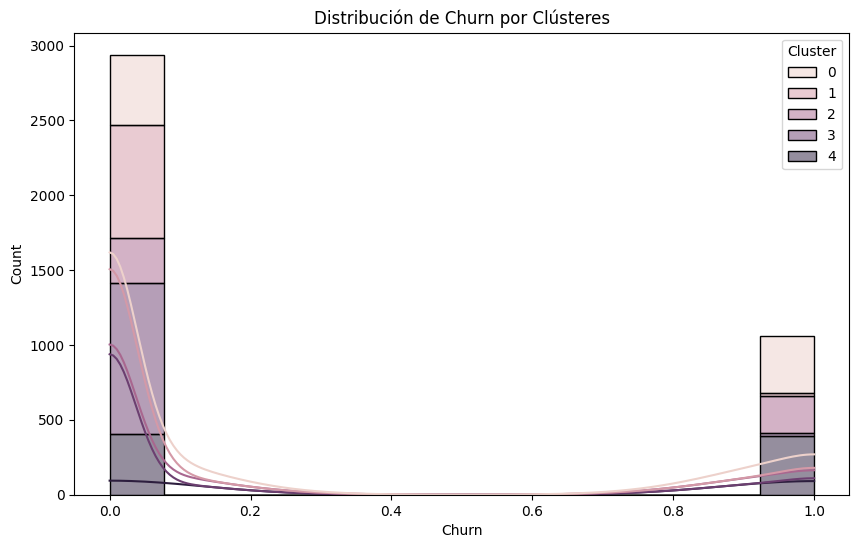

In [21]:
for column in df.drop('Cluster', axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue="Cluster", multiple="stack", kde=True)
    plt.title(f'Distribución de {column} por Clústeres')
    plt.show()

Podemos notar que el clúster 4 tiene la tasa de cancelación más alta, lo que sugiere que los usuarios de este grupo tienen una baja probabilidad de continuar con el servicio. Los clústeres 1 y 3 también presentan tasas de cancelación considerables, mientras que los clústeres 0 y 2 tienen tasas de cancelación mucho menores, lo que indica que estos usuarios son más leales o satisfechos. Tabién destacar que los usuarios de los clústeres 0, 2 y 3 tienen una frecuencia de visitas similar, mientras que los clústeres 4 y 1 tienen una frecuencia de visitas significativamente más baja. 

Podriamos decir que tenemos:

-Usuarios más comprometidos: Clúster 2, con baja tasa de cancelación y alta lealtad.

-Usuarios con menor compromiso: Clústeres 4 y 1, con altas tasas de cancelación y baja frecuencia de visitas.

-Usuarios intermedios: Clúster 3, con una tasa de cancelación moderada y frecuencia de visitas también moderada.

-Usuarios satisfechos pero no tan activos: Clúster 0, con baja tasa de cancelación y frecuencia de visitas moderada.

# Tasa de cancelación

Se calcula la tasa de cancelación por cada clúster

In [22]:
cancel_rate = df.groupby('Cluster')['Churn'].mean()
print(cancel_rate)
print("\n")
for cluster, rate in cancel_rate.items():
    if rate > 0.5:
        print(f"El clúster {cluster} tiene una alta tasa de cancelación.")
    else:
        print(f"El clúster {cluster} tiene una baja tasa de cancelación.")

Cluster
0    0.445358
1    0.030968
2    0.448718
3    0.022222
4    0.491803
Name: Churn, dtype: float64


El clúster 0 tiene una baja tasa de cancelación.
El clúster 1 tiene una baja tasa de cancelación.
El clúster 2 tiene una baja tasa de cancelación.
El clúster 3 tiene una baja tasa de cancelación.
El clúster 4 tiene una baja tasa de cancelación.


# Conclusión

Clústeres con baja tasa de cancelación (menos del 50%): Clústeres 0, 1, 2, 3
Estos grupos presentan tasas de cancelación bajas, lo que sugiere que los usuarios de estos clústeres son más leales y satisfechos con el servicio. Es probable que estos usuarios se mantengan en el gimnasio porque están comprometidos con su rutina o han encontrado un servicio que satisface sus necesidades.

Clúster con alta tasa de cancelación (mayor al 50%): Clúster 4
Este grupo presenta la tasa de cancelación más alta (56.22%), lo que indica que estos usuarios tienen una alta probabilidad de cancelar su suscripción. Esto podría estar relacionado con insatisfacción, una mala experiencia o una falta de compromiso. El Clúster 4 necesita una atención urgente para evitar que más usuarios abandonen el servicio.

Estrategias de intervención:

-Para el Clúster 4:
Implementar estrategias de retención como promociones personalizadas, encuestas de satisfacción, y la mejora de la experiencia del cliente. Estas acciones podrían ayudar a aumentar el compromiso y reducir la tasa de cancelación.

-Para los clústeres 0, 1, 2 y 3:
La estrategia debería centrarse en optimizar la experiencia para mantener la satisfacción y lealtad. Podría incluir incentivos, mejoras continuas en el servicio, y la implementación de recompensas por fidelidad para fortalecer el vínculo con estos usuarios comprometidos.

Resumen adicional de estrategias:

-Flexibilidad en los contratos: Ofrecer contratos más flexibles podría atraer a nuevos usuarios que prefieren opciones de renovación más accesibles, como planes mensuales o descuentos por suscripción prolongada.

-Optimización de la oferta de clases y servicios: Para los usuarios de alto compromiso que asisten regularmente, se podría considerar una oferta de clases más diversa y personalizada, además de mejoras en la experiencia dentro del gimnasio.

-Premiar a los usuarios de largo plazo: Para mantener el interés de los usuarios más antiguos, sería útil ofrecerles metas nuevas (como desafíos o programas exclusivos) y beneficios exclusivos que fortalezcan su conexión con el gimnasio y fomenten la fidelidad.